<a href="https://colab.research.google.com/github/paradkarpravin15/Predicting_Health_Insurance_Price/blob/main/Predicting_Health_Insurance_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Health Insurance Price for an individual or family

# Target Variable (Dependent Variable):



*   health_insurance_price



# Data Understanding

In [215]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In this section, we import essential Python libraries for:

- Data handling (Pandas, NumPy)
- Visualization (Seaborn, Matplotlib)
- Preprocessing and building machine learning models (scikit-learn)

In [216]:
# Load the dataset
df = pd.read_excel("/content/Health_insurance_cost_dataset.xlsx")
print(df)

       age  gender     BMI  Children smoking_status   location  \
0     19.0  female     NaN         0            yes  southwest   
1     18.0    male  33.770         1             no  southeast   
2     28.0    male  33.000         3             no  southeast   
3     33.0    male  22.705         0             no  northwest   
4     32.0    male  28.880         0             no  northwest   
...    ...     ...     ...       ...            ...        ...   
1333  50.0    male  30.970         3             no  northwest   
1334  18.0  female  31.920         0             no  northeast   
1335  18.0  female  36.850         0             no  southeast   
1336  21.0  female  25.800         0             no  southwest   
1337  61.0  female  29.070         0            yes  northwest   

      health_insurance_price  
0                16884.92400  
1                 1725.55230  
2                 4449.46200  
3                21984.47061  
4                 3866.85520  
...                  

We load the dataset using Pandas, then explore its structure and check for:

- Null values
- Duplicate records
- Data types
- Summary statistics

In [217]:
# Display first 5 rows
print("First 5 rows of the dataset: ")
print(df.head())

First 5 rows of the dataset: 
    age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  


Its show the first 5 rcords from the dataset

In [218]:
# Display last 5 rows
print("Last 5 rows of the dataset: ")
print(df.tail())

Last 5 rows of the dataset: 
       age  gender    BMI  Children smoking_status   location  \
1333  50.0    male  30.97         3             no  northwest   
1334  18.0  female  31.92         0             no  northeast   
1335  18.0  female  36.85         0             no  southeast   
1336  21.0  female  25.80         0             no  southwest   
1337  61.0  female  29.07         0            yes  northwest   

      health_insurance_price  
1333              10600.5483  
1334               2205.9808  
1335               1629.8335  
1336               2007.9450  
1337              29141.3603  


Its show the last 5 rcords from the dataset

In [219]:
# size of the dataset
print("Dataset Shape:", end=" ")
print(df.shape) # (rows, columns)

Dataset Shape: (1338, 7)


Its show shape of the dataset like how many rows and columns are present in the datsset.

In [220]:
# Check data types and memory usage
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


The dataset has 1,338 entries and 7 columns, with missing values in age, BMI, and health_insurance_price, while all other columns are complete.

And are three catgorical columns - gender, smoking_status, location.

In [221]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


There are missing values in age, BMI, and health_insurance_price.

In [222]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          BMI     Children  health_insurance_price
count  1310.000000  1315.000000  1338.000000             1336.000000
mean     39.166412    30.638217     1.094918            13268.527719
std      14.055378     6.110302     1.205493            12112.797724
min      18.000000    15.960000     0.000000             1121.873900
25%      26.000000    26.210000     0.000000             4744.325050
50%      39.000000    30.305000     1.000000             9382.033000
75%      51.000000    34.580000     2.000000            16604.302645
max      64.000000    53.130000     5.000000            63770.428010


In [223]:
# Summary statistics for categorical columns
print("Categorical feature summary:")
print(df.describe(include=['object']))

Categorical feature summary:
       gender smoking_status   location
count    1338           1338       1338
unique      2              2          4
top      male             no  southeast
freq      676           1064        364


In [224]:
# Unique values in each column
print("Unique values per column:")
for col in df.columns:
  print(f"{col}:  {df[col].nunique()} unique values")

Unique values per column:
age:  47 unique values
gender:  2 unique values
BMI:  545 unique values
Children:  6 unique values
smoking_status:  2 unique values
location:  4 unique values
health_insurance_price:  1335 unique values


In [225]:
# Check for duplicate rows
print("Number of Duplicate Rows:",end=" ")
print(df.duplicated().sum())

Number of Duplicate Rows: 1


In [226]:
# Show the duplicate rows
print("Duplicate Rows:")
print(df[df.duplicated()])

Duplicate Rows:
      age gender    BMI  Children smoking_status   location  \
581  19.0   male  30.59         0             no  northwest   

     health_insurance_price  
581               1639.5631  


Its show duplicated row in the dataset.

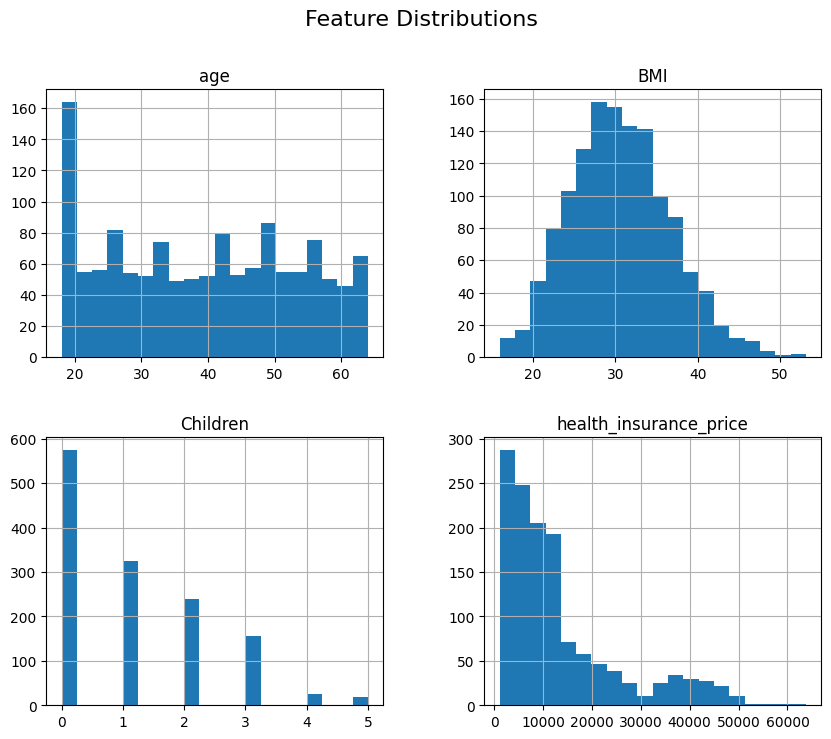

In [227]:
# Histogram for numerical columns
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Its show distribution of all numerical columns

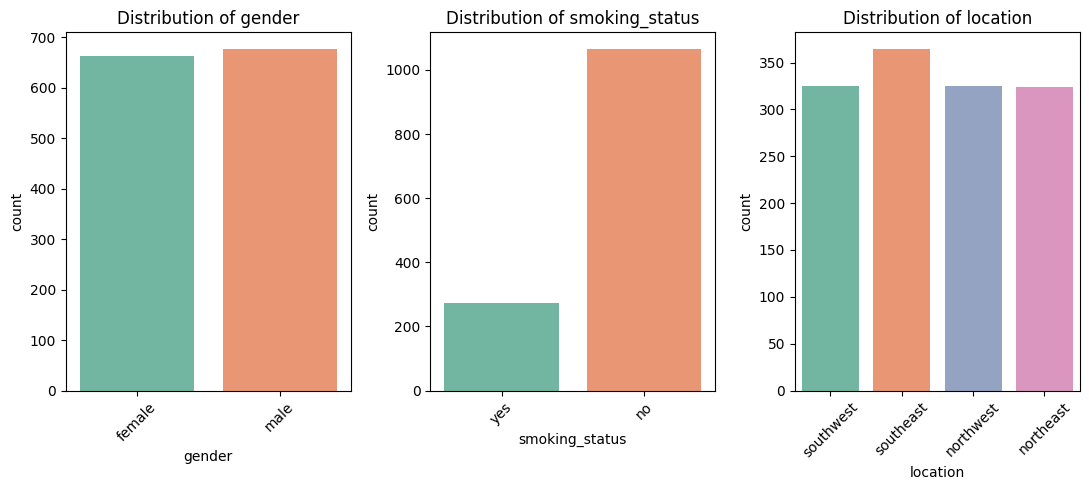

In [228]:
# Countplot for categorical variables
categorical_features = ["gender", "smoking_status", "location"]
plt.figure(figsize=(11,5))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)  # Use 'first_sheet_df'
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Its show distribution of all categorical
columns

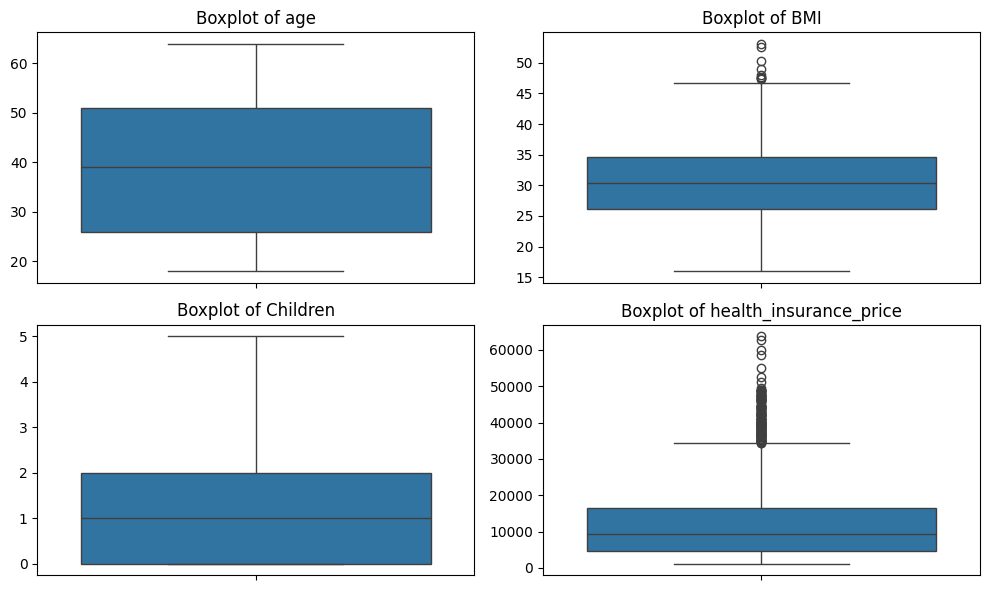

In [229]:
# Boxplot for numerical features to check for outliers
numerical_features = ['age','BMI','Children','health_insurance_price']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

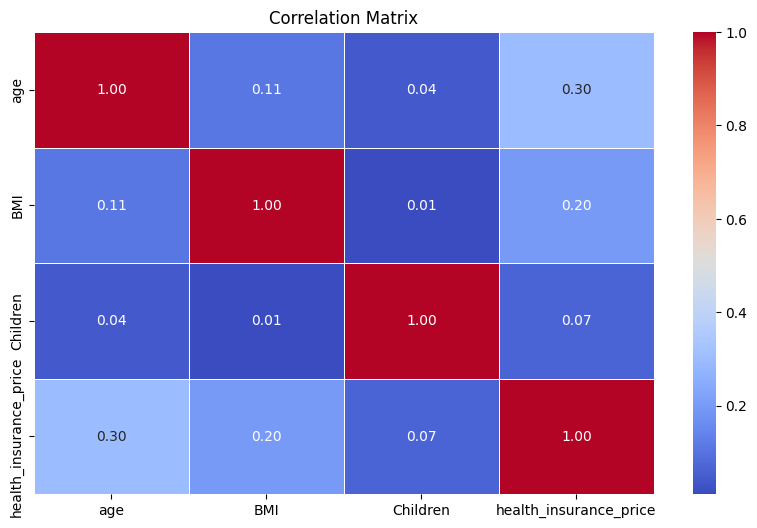

In [230]:
# # Plot heatmap to visualize correlation between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

We visualize the correlation between features using a heatmap to understand relationships and multicollinearity.

# Data Preprocessing

## Handling Duplicates

In [231]:
# check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1


In [232]:
# Remove duplicate rows
df = df.drop_duplicates()

In [233]:
# Verify removal
print(f"New dataset shape after removing duplicates: {df.shape}")

New dataset shape after removing duplicates: (1337, 7)


# Handling Missing Values

In [234]:
# Check missing values before imputation
print("Missing values before imputation: ")
print(df.isnull().sum())

Missing values before imputation: 
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [235]:
# creating separate copies for different imputation techniques
df_mean = df.copy()
df_median = df.copy()
df_interpolation = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

In [236]:
# mean imputation
df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean())
df_mean["BMI"] = df_mean["BMI"].fillna(df_mean["BMI"].mean())

In [237]:
df_mean = df_mean.dropna(subset=['health_insurance_price'])

In [238]:
# Display missing values
print("Missing values after Mean Imputation:")
print(df_mean.isnull().sum())

Missing values after Mean Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


---------------------------------------------------------------------------------------------

In [239]:
# median imputation
df_median["age"] = df_median["age"].fillna(df_median["age"].median())
df_median["BMI"] = df_median["BMI"].fillna(df_median["BMI"].median())

In [240]:
df_median = df_median.dropna(subset=['health_insurance_price'])

In [241]:
# Display missing values
print("Missing values after Median Imputation:")
print(df_median.isnull().sum())

Missing values after Median Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [242]:
# Display all values are filled
print(df_median.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1335 non-null   float64
 1   gender                  1335 non-null   object 
 2   BMI                     1335 non-null   float64
 3   Children                1335 non-null   int64  
 4   smoking_status          1335 non-null   object 
 5   location                1335 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.4+ KB
None


i have median to handling missing values in dataset and replace with main dataset (df)

-----------------------------------------------------------------------------------------

In [243]:
# Interpotaion - Fills missing values using linear interpolation
# median imputation
df_interpolation["age"] = df_interpolation["age"].fillna(df_interpolation["age"].interpolate(method="linear"))
df_interpolation["BMI"] = df_interpolation["BMI"].fillna(df_interpolation["BMI"].interpolate(method="linear"))

In [244]:
df_interpolation = df_interpolation.dropna(subset=['health_insurance_price'])

In [245]:
print("Missing values after Interpolation:")
print(df_interpolation.isnull().sum())

Missing values after Interpolation:
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [246]:
# Forward Fill(ffill) - Uses prevoius values to fill missing values
df_ffill["age"] = df_ffill["age"].ffill()
df_ffill["BMI"] = df_ffill["BMI"].ffill()

In [247]:
df_ffill = df_ffill.dropna(subset=['health_insurance_price'])

In [248]:
print("Missing values after Forward Fill (ffill):")
print(df_ffill.isnull().sum())

Missing values after Forward Fill (ffill):
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [249]:
# Backward Fill(bfill) - Uses next values to fill missing values
df_bfill["age"] = df_bfill["age"].bfill()
df_bfill["BMI"] = df_bfill["BMI"].bfill()

In [250]:
df_bfill = df_bfill.dropna(subset=['health_insurance_price'])

In [251]:
print("Missing values after Backward Fill (bfill):")
print(df_bfill.isnull().sum())

Missing values after Backward Fill (bfill):
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


I have have selected median to fill null values - df_median

In [252]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1335 non-null   float64
 1   gender                  1335 non-null   object 
 2   BMI                     1335 non-null   float64
 3   Children                1335 non-null   int64  
 4   smoking_status          1335 non-null   object 
 5   location                1335 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.4+ KB


# Handling Outliers

In [253]:
from scipy.stats import zscore

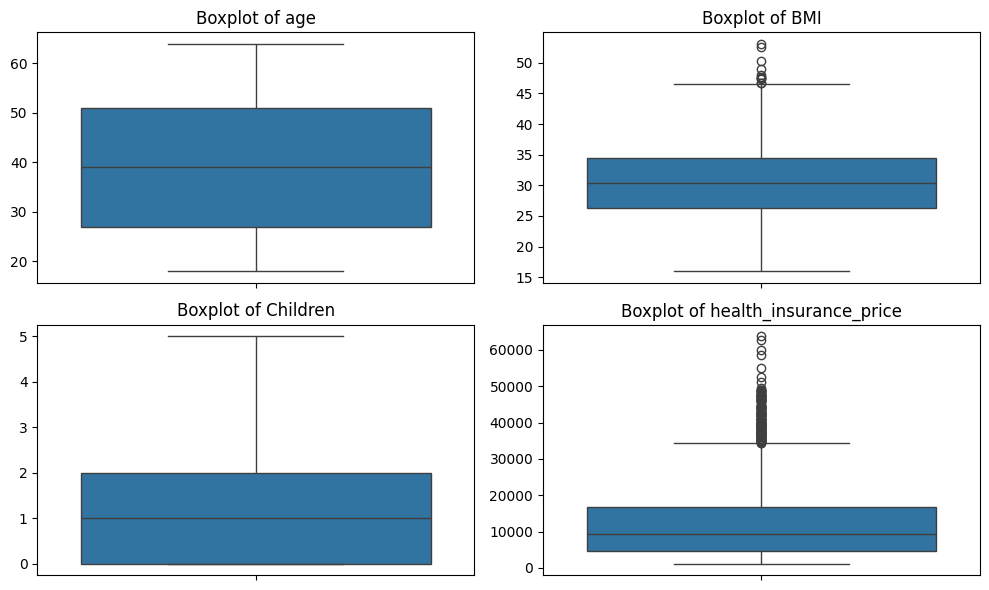

In [254]:
numerical_features = ['age','BMI','Children','health_insurance_price']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df_median, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

In [255]:
# # Detecting Outliers using Z-Score
# z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
# outliers_z = (z_scores>3).sum()
# print("Outliers detected using Z-Score:\n",outliers_z)

In [256]:
# Select only numeric columns
numeric_df = df_median.select_dtypes(include=["number"])

In [257]:
numeric_df

,age,BMI,Children,health_insurance_price
0,19.0,30.305,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3,10600.54830
1334,18.0,31.920,0,2205.98080
1335,18.0,36.850,0,1629.83350
1336,21.0,25.800,0,2007.94500


In [258]:
# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [259]:
# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR))|(numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected using IQR:\n",outliers_iqr)

Outliers detected using IQR:
 age                         0
BMI                        11
Children                    0
health_insurance_price    141
dtype: int64


## Removing Outliers using IQR (Interquartile Range)

Removes values beyond 1.5 * IQR -- Good for non-normal data

In [260]:
# Select only numerical columns
numeric_df = df_median.select_dtypes(include=["number"])

In [261]:
# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [262]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(age                          -9.000000
 BMI                          14.142500
 Children                     -3.000000
 health_insurance_price   -13066.415245
 dtype: float64,
 age                          87.000000
 BMI                          46.602500
 Children                      5.000000
 health_insurance_price    34435.221275
 dtype: float64)

In [263]:
# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)

In [264]:
# Filter out outliers
df_cleaned = df_median[~outliers_mask.any(axis=1)]

In [265]:
print("Original Data Shape:",df_median.shape)
print("After IQR Outlier Removal:",df_cleaned.shape)

Original Data Shape: (1335, 7)
After IQR Outlier Removal: (1186, 7)


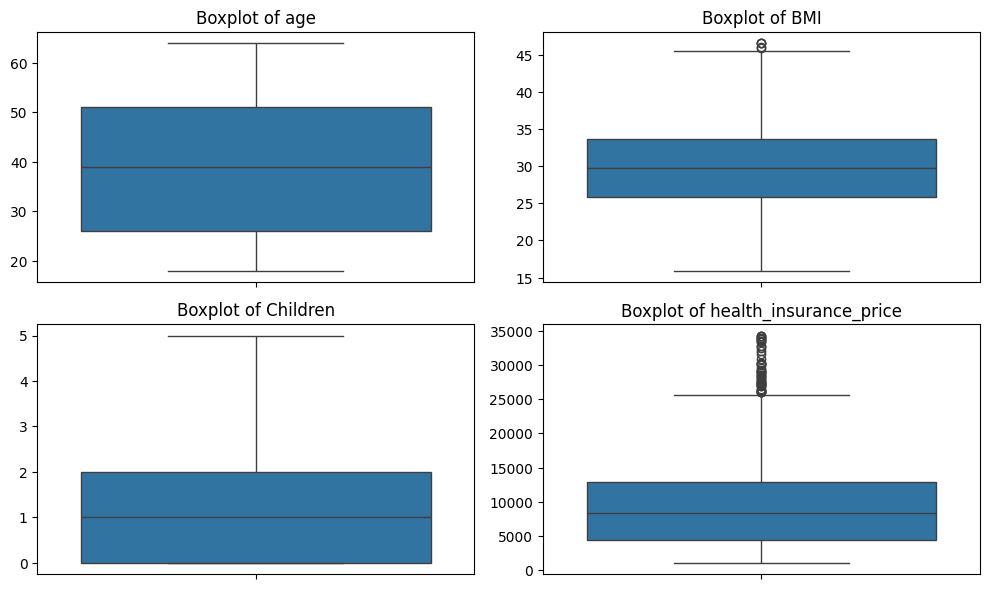

In [266]:
# Boxplot for check removing Outliers using IQR (Interquartile Range)
numerical_features = ['age','BMI','Children','health_insurance_price']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df_cleaned, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

## Removing Outliers using Z-Score

Removes values with Z > 3 -- Best for normally distributed data

In [267]:
from scipy.stats import zscore

In [268]:
# Compute Z-Scores for numerical columns
z_scores = np.abs(zscore(df_median.select_dtypes(include=[np.number])))

In [269]:
print(z_scores)

[[1.45103968 0.05296611 0.90824519 0.29794375]
 [1.52295867 0.51953905 0.07889681 0.95400578]
 [0.80376878 0.39231568 1.57979994 0.72904939]
 ...
 [1.52295867 1.02843254 0.90824519 0.9619108 ]
 [1.3072017  0.79730544 0.90824519 0.93068414]
 [1.56955786 0.25701918 0.90824519 1.31015191]]


In [270]:
# Keep only data points where Z-score is within ±3
df_z = df_median[(z_scores < 3).all(axis=1)]

In [271]:
print("Original Data Shape:",df_median.shape)
print("After Z-Score Outlier Removal:",df_z.shape)

Original Data Shape: (1335, 7)
After Z-Score Outlier Removal: (1306, 7)


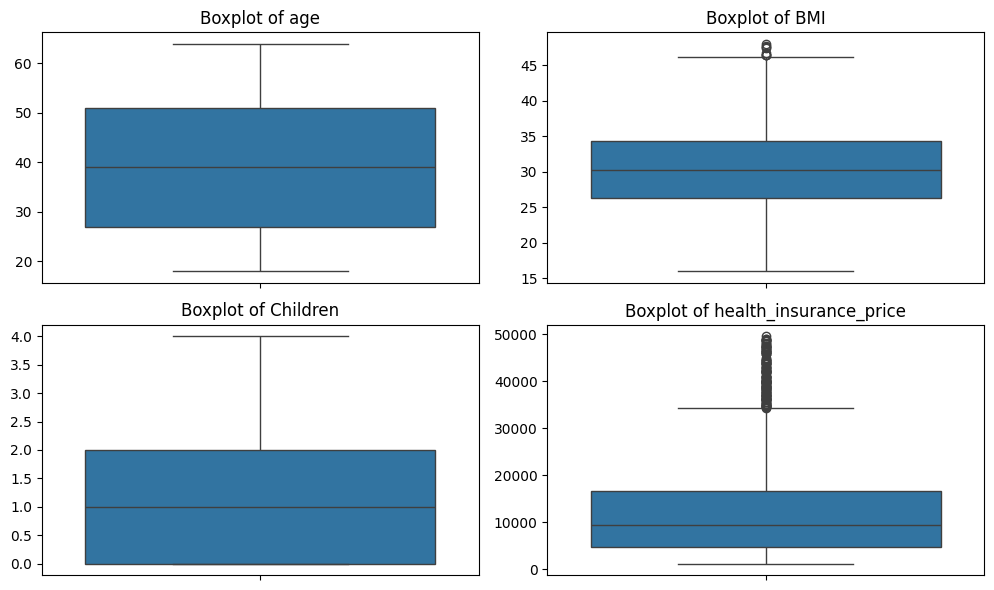

In [272]:
# Boxplot check for removed outliers using Z-Score
numerical_features = ['age','BMI','Children','health_insurance_price']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df_z, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

## Winsorization (Capping Outliers)

Caps extreme values instead of removing them -- Useful when data loss is not acceptable

In [273]:
from scipy.stats.mstats import winsorize

In [274]:
# Its store all numerical data
numeric_df

,age,BMI,Children,health_insurance_price
0,19.0,30.305,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3,10600.54830
1334,18.0,31.920,0,2205.98080
1335,18.0,36.850,0,1629.83350
1336,21.0,25.800,0,2007.94500


In [275]:
numeric_df.isnull().sum()

,0
age,0
BMI,0
Children,0
health_insurance_price,0


In [276]:
df_winsor = df_median.copy()

In [277]:
df_winsor

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [278]:
# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in numeric_df.columns:
  df_winsor[col] = winsorize(df_median[col], limits=[0.05,0.05])

In [279]:
print("Original Data Shape:",df_median.shape)
print("After Winsorization (Capping):",df_winsor.shape)

Original Data Shape: (1335, 7)
After Winsorization (Capping): (1335, 7)


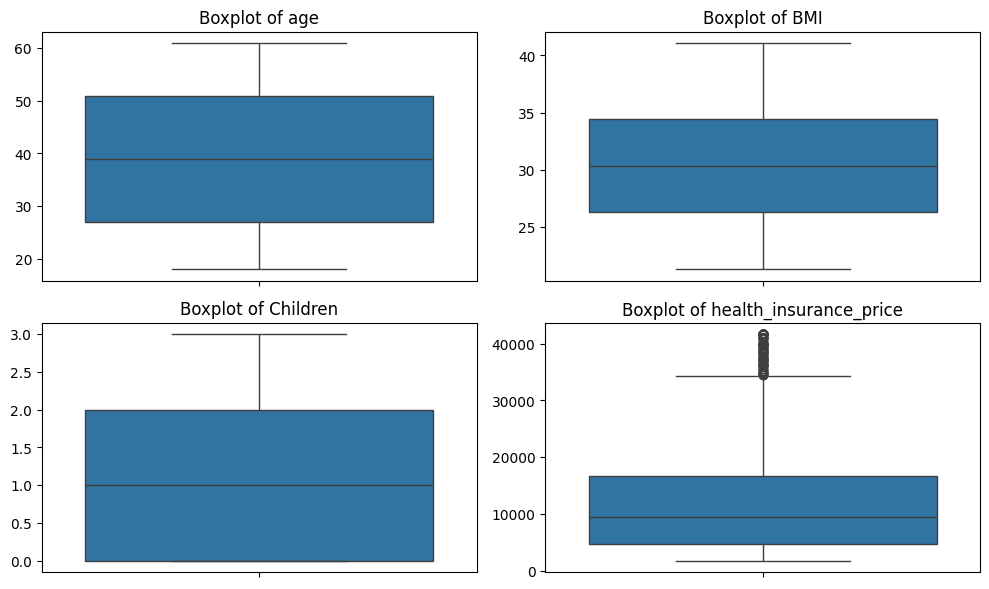

In [280]:
# using boxplot checking outliers removed method- Winsorization (Capping Outliers)
numerical_features = ['age','BMI','Children','health_insurance_price']

plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df_winsor, y=col)
  plt.title(f"Boxplot of {col}")
  plt.ylabel("")
plt.tight_layout()
plt.show()

## Scaling

In [281]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [282]:
# Create separate copies of the dataset for each scaling method
df_minmax = df_winsor.copy()
df_standard = df_winsor.copy()
df_robust = df_winsor.copy()

In [283]:
# Selecting only numerical columns for scaling
num_cols = df_median.select_dtypes(include=["number"]).columns

In [284]:
# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [285]:
df_minmax

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,0.023256,female,0.455348,0.000000,yes,southwest,0.379066
1,0.000000,male,0.630172,0.333333,no,southeast,0.000000
2,0.232558,male,0.591322,1.000000,no,southeast,0.067418
3,0.348837,male,0.071897,0.000000,no,northwest,0.506867
4,0.325581,male,0.383451,0.000000,no,northwest,0.052817
...,...,...,...,...,...,...,...
1333,0.744186,male,0.488900,1.000000,no,northwest,0.221572
1334,0.000000,female,0.536831,0.000000,no,northeast,0.011193
1335,0.000000,female,0.785570,0.000000,no,southeast,0.000000
1336,0.069767,female,0.228052,0.000000,no,southwest,0.006230


In [286]:
#  Standardize features for model training (Mean=0, Std=1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_robust[num_cols])

We standardize features using StandardScaler to normalize the input variables before training models.

In [287]:
df_standard

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,-1.461093,female,-0.048608,-0.955994,yes,southwest,0.337103
1,-1.533861,male,0.576850,-0.045036,no,southeast,-0.989647
2,-0.806177,male,0.437859,1.776879,no,southeast,-0.753681
3,-0.442334,male,-1.420463,-0.955994,no,northwest,0.784413
4,-0.515103,male,-0.305831,-0.955994,no,northwest,-0.804784
...,...,...,...,...,...,...,...
1333,0.794730,male,0.071430,1.776879,no,northwest,-0.214135
1334,-1.533861,female,0.242911,-0.955994,no,northeast,-0.950469
1335,-1.533861,female,1.132813,-0.955994,no,southeast,-0.989647
1336,-1.315556,female,-0.861793,-0.955994,no,southwest,-0.967840


In [288]:
# Robust Scaling (Uses Median & IQR - Good for Outliers)
robust_scale = RobustScaler()
df_robust[num_cols] = robust_scale.fit_transform(df_robust[num_cols])

In [289]:
df_robust

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,-0.833333,female,0.000000,-0.5,yes,southwest,0.631453
1,-0.875000,male,0.426987,0.0,no,southeast,-0.642237
2,-0.458333,male,0.332101,1.0,no,southeast,-0.415708
3,-0.250000,male,-0.936537,-0.5,no,northwest,1.060874
4,-0.291667,male,-0.175601,-0.5,no,northwest,-0.464768
...,...,...,...,...,...,...,...
1333,0.458333,male,0.081947,1.0,no,northwest,0.102261
1334,-0.875000,female,0.199014,-0.5,no,northeast,-0.604626
1335,-0.875000,female,0.806531,-0.5,no,southeast,-0.642237
1336,-0.750000,female,-0.555145,-0.5,no,southwest,-0.621302


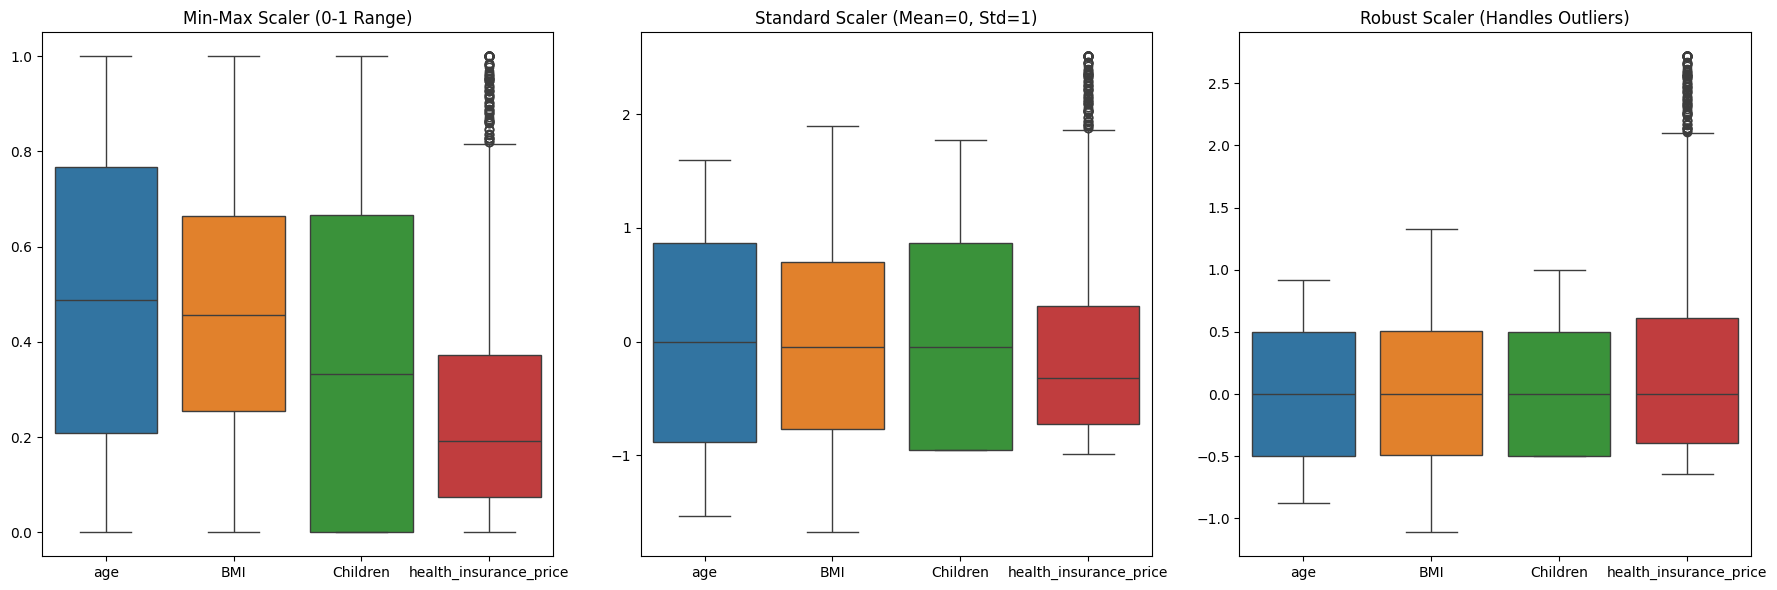

In [290]:
# Visualizing the differences
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Min-Max Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")
plt.tight_layout()
plt.show()

## Min-Max Scaler (Left Plot)

1. Scales data to a 0-1 range.
2. The boxplots show values rescaled between 0 and 1.
3. The distribution remains the same, but the scale is compressed.
4. Outliers are still present, which is expected since Min-Max scaling does not handle outliers.

## Standard Scaler (Middle Plot)

1. Standardizes data to have a mean of 0 and a standard deviation of 1.
2. The data is centered around 0.
3. Outliers (values beyond ±3) are still visible, indicating that extreme values are not removed.
4. This method is sensitive to outliers.

## Robust Scaler (Right Plot)

1. Scales data based on median and IQR, making it resistant to outliers.
2. The boxplots confirm that extreme values are less influential compared to Standard Scaler.
3. This is useful when the dataset contains many outliers.

# Encoding the Categorical Data

We use Label Encoding to convert categorical variables into numerical format for compatibility with machine learning algorithms.

In [291]:
from sklearn.preprocessing import LabelEncoder

In [292]:
# Selecng categorical columns
cat_cols = df_robust.select_dtypes(include=['object']).columns

In [293]:
# Encode categorical variables using LabelEncoder
# Initialize the LabelEncoder
la = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df_robust[col] = la.fit_transform(df_robust[col])

In [294]:
# showing first few rows
print("Label Encoded Data:")
print(df_robust.head())

Label Encoded Data:
        age  gender       BMI  Children  smoking_status  location  \
0 -0.833333       0  0.000000      -0.5               1         3   
1 -0.875000       1  0.426987       0.0               0         2   
2 -0.458333       1  0.332101       1.0               0         2   
3 -0.250000       1 -0.936537      -0.5               0         1   
4 -0.291667       1 -0.175601      -0.5               0         1   

   health_insurance_price  
0                0.631453  
1               -0.642237  
2               -0.415708  
3                1.060874  
4               -0.464768  


In [295]:
print("\nShape of the DataFrame (rows, columns):")
print(df_robust.shape)


Shape of the DataFrame (rows, columns):
(1335, 7)


# Data Splitting (Train-Test Split)

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
# Define features (X) and target variable (y)
X = df_robust.drop(columns=['health_insurance_price']) # features
y = df_robust['health_insurance_price']  # target variable

In [298]:
print(X)

           age  gender       BMI  Children  smoking_status  location
0    -0.833333       0  0.000000      -0.5               1         3
1    -0.875000       1  0.426987       0.0               0         2
2    -0.458333       1  0.332101       1.0               0         2
3    -0.250000       1 -0.936537      -0.5               0         1
4    -0.291667       1 -0.175601      -0.5               0         1
...        ...     ...       ...       ...             ...       ...
1333  0.458333       1  0.081947       1.0               0         1
1334 -0.875000       0  0.199014      -0.5               0         0
1335 -0.875000       0  0.806531      -0.5               0         2
1336 -0.750000       0 -0.555145      -0.5               0         3
1337  0.916667       0 -0.152187      -0.5               1         1

[1335 rows x 6 columns]


In [299]:
print(y)

0       0.631453
1      -0.642237
2      -0.415708
3       1.060874
4      -0.464768
          ...   
1333    0.102261
1334   -0.604626
1335   -0.642237
1336   -0.621302
1337    1.663538
Name: health_insurance_price, Length: 1335, dtype: float64


In [300]:
# Perform train-test split (Stratified for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split the balanced dataset into training and testing sets for model evaluation.

In [301]:
print(X.shape, X_train.shape, X_test.shape)

(1335, 6) (1068, 6) (267, 6)


# Linear Regression Model Training

In [302]:
from sklearn.linear_model import LinearRegression

In [303]:
# loading linear regression model
lr_model = LinearRegression()

In [304]:
# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [305]:
# Make predictions on test data
y_pred_lr = lr_model.predict(X_test)

In [306]:
print("Linear Regression Performance")
print(f"Accuracy Score:",lr_model.score(X_test,y_test)*100)

Linear Regression Performance
Accuracy Score: 82.76836754373782


Linear Regression Model training and prediction were successful.

# Model Evaluation for Linear Regression

In [307]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [308]:
# Model Evaluation:
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

MAE: 0.32899403640691405
MSE: 0.1961106631835952
RMSE: 0.1961106631835952
R² Score: 0.8276836754373782


In [309]:
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"{name}: {coef}")

age: 0.49268972582183324
gender: -0.022411843103699217
BMI: 0.20642310929697338
Children: 0.0930957167446882
smoking_status: 1.8326669368332433
location: -0.02249844844852761


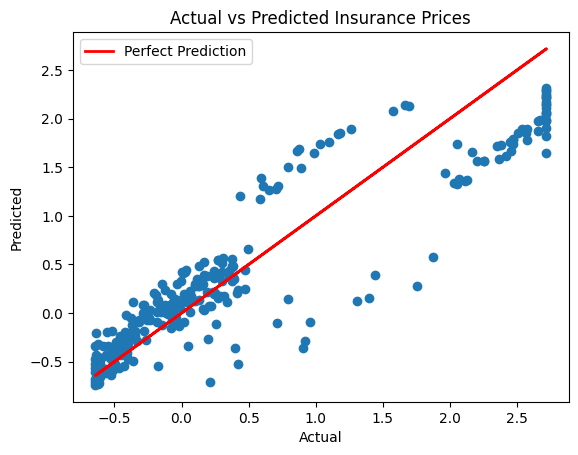

In [310]:
plt.scatter(y_test, y_pred_lr)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Insurance Prices")
plt.legend()    # This shows the label for the red line
plt.show()

# Random Forest Regressor Model Training


In [311]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [312]:
# Loading Random Forest Regressor Model
rf_model = RandomForestRegressor(max_depth=2, random_state=0)

In [313]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [314]:
y_pred_rf = rf_model.predict(X_test)

In [315]:
print("Random Forest Regression Performance")
print(f"Accuracy Score:",rf_model.score(X_test,y_test)*100)

Random Forest Regression Performance
Accuracy Score: 89.09440164404525


Random Forest Regressor training and prediction were successful.

# Model Evaluation for Random Forest Regressor

In [316]:
# Model Evaluation:
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

MAE: 0.23782627921808241
MSE: 0.12411500369618084
RMSE: 0.12411500369618084
R² Score: 0.8909440164404525


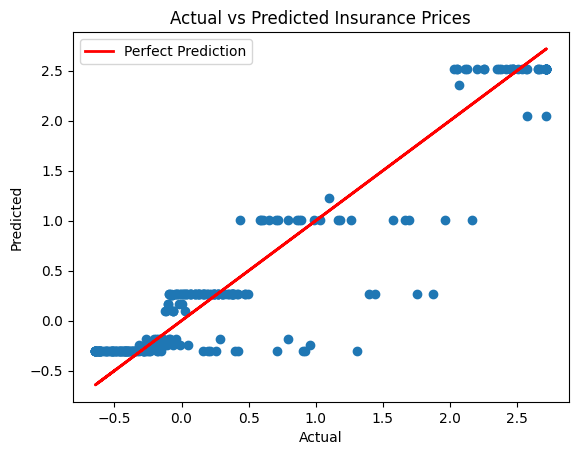

In [317]:
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Insurance Prices")
plt.legend()  # This shows the label for the red line
plt.show()

# Decision Tree Regressor Model Training

In [318]:
from sklearn.tree import DecisionTreeRegressor

In [319]:
# loading and training decision tree regression model
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [320]:
# Make predictions on test data
y_pred_dt = dt_model.predict(X_test)

In [321]:
print("Decision Tree Regression Performance")
print(f"Accuracy Score:",dt_model.score(X_test,y_test)*100)

Decision Tree Regression Performance
Accuracy Score: 78.26582370054028


# Model Evaluation for Decision Tree Regressor

In [322]:
# Model Evaluation:
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

MAE: 0.21669262956747398
MSE: 0.24735344945726542
RMSE: 0.24735344945726542
R² Score: 0.7826582370054028


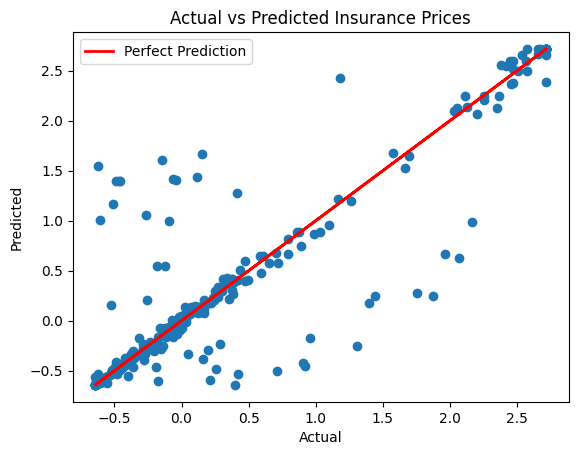

In [323]:
plt.scatter(y_test, y_pred_dt)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Insurance Prices")
plt.legend()  # This shows the label for the red line
plt.show()

# Model Comparison

summarize performance metrics in a comparison table and visualize them using grouped bar charts to help identify the best-performing model.

In [327]:
# Import performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using all three trained models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics, Store model performance metrics in a dictionary
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_dt)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_dt)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt))
    ],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_dt)
    ]
}

# Display results
results_df = pd.DataFrame(metrics)
print("Model Performance Comparison:\n")
print(results_df)

#  Identify and print the model with the best accuracy
best_model = results_df.loc[results_df['R² Score'].idxmax()]
print(f"\nBest Performance Model: {best_model['Model']} with R² Score: {best_model['R² Score']:.4f}")


Model Performance Comparison:

                     Model       MAE       MSE      RMSE  R² Score
0        Linear Regression  0.328994  0.196111  0.442844  0.827684
1  Random Forest Regressor  0.237826  0.124115  0.352300  0.890944
2  Decision Tree Regressor  0.216693  0.247353  0.497346  0.782658

Best Performance Model: Random Forest Regressor with R² Score: 0.8909


# Visual Comparison of Model Performance

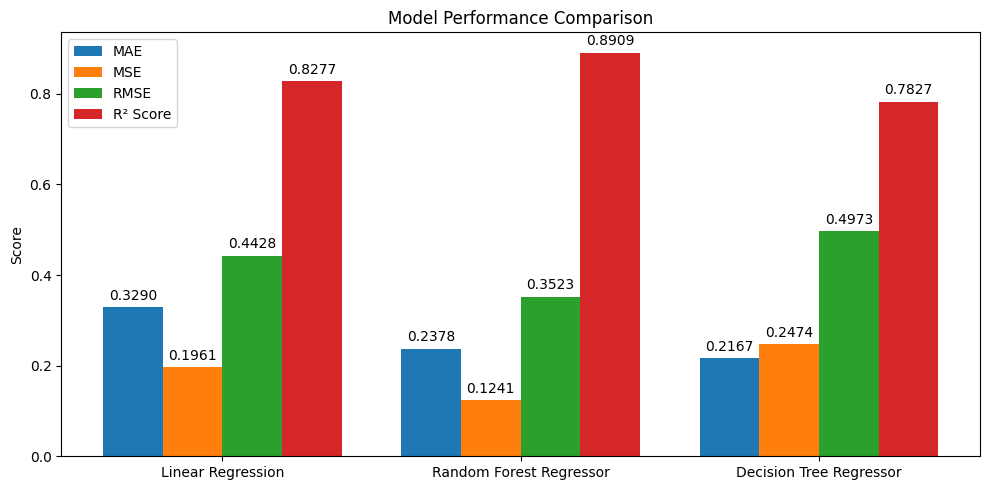

In [329]:
# Set up bar chart positions and width
bar_width = 0.2
models = results_df['Model']
x = np.arange(len(models))

# Create a new figure for the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars for each metric
bars1 = ax.bar(x - 1.5*bar_width, results_df['MAE'], width=bar_width, label='MAE')
bars2 = ax.bar(x - 0.5*bar_width, results_df['MSE'], width=bar_width, label='MSE')
bars3 = ax.bar(x + 0.5*bar_width, results_df['RMSE'], width=bar_width, label='RMSE')
bars4 = ax.bar(x + 1.5*bar_width, results_df['R² Score'], width=bar_width, label='R² Score')

# Function to add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to all bars
for bars in [bars1, bars2, bars3, bars4]:
    add_labels(bars)

# Set x-axis labels and chart title
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Results:

- Random Forest delivered the best performance , striking a strong balance between MSE and RMSE.

- Reduced false negatives, which are critical in fraud detection.

- Random Forest Regressor outperformed the other models, achieving the highest R² score of 0.8909 and the lowest error rates (MAE: 0.2378, MSE: 0.1241, RMSE: 0.3523), indicating strong predictive accuracy.

- Linear Regression showed a decent performance with an R² score of 0.8277 but higher error rates compared to Random Forest.

- Decision Tree Regressor had the lowest MAE (0.2167) but a lower R² score (0.7827) and the highest RMSE (0.4973), suggesting less consistency in predictions.

# Conclusion:

- Random Forest Regressor is the most suitable model for this problem, offering the best balance between accuracy and error minimization.

- The model revealed that smoking status, age, and BMI are the most influential factors in determining insurance costs.

- Ensemble techniques like Random Forest help reduce variance and improve generalization, making them more robust than individual decision trees or linear models.


------------------------------------------------------------------------------------------